## In Class Activity 2

**Group 6** : *Daniel Kim, Madeline Tibaldi, Jifei Xiao, Logan Knight, Lekha Koganti*

**Explanation of Code**: The following code serves to build a "simple leaky integrate and fire (LIF) model neuron in Python and visualize/analyze the firing patterns made in response to different input currents", as per the assignment instructions. More about LIF neurons can be found here https://neuronaldynamics.epfl.ch/online/Ch1.S3.html


In [19]:
 ## Code
import numpy as np
import matplotlib.pyplot as plt

class LIFNeuron:
    # The following is defining functions for variables as well as the integrating and firing of neurons
    
    def __init__(self, tau, R, threshold, resting_potential):
        self.tau = tau 
        # This above value represents the membrane time constant
        
        self.R = R  
        # This above value represents the membrane resistance
        
        self.threshold = threshold  
        # This above value represents the firing threshold
        
        self.resting_potential = resting_potential  
        # This above value represents the resting membrane potential

        #This next portion sets up the ability to calculate leaky intergration and check for spikes
        self.membrane_potential = self.resting_potential
        self.spike_times = []

    def integrate_and_fire(self, input_current, dt):
        # This above value represents leaky integration using Euler method and below represents these calculations
        delta_v = (input_current - (self.membrane_potential - self.resting_potential) / self.R) * dt / self.tau
        self.membrane_potential += delta_v

        # This next portion is how we are able to check for spikes, dependent on spike times, spike membrane, and spike thresholds
        if self.membrane_potential >= self.threshold:
            self.spike_times.append(dt)
            self.membrane_potential = self.resting_potential
            
        #The code below is defining a function that would simulate a certain neuron response
    def simulate(self, input_currents, dt):
        for current in input_currents:
            self.integrate_and_fire(current, dt)

        # The code below is defining a function to plot the results of a simulation of a certain neuron response
    def plot_results(self, input_currents, dt):
        time = np.arange(0, len(input_currents) * dt, dt)

        plt.figure(figsize=(10, 6))

        # This next portion of code allows us to plot the input current and output a figure
        plt.subplot(2, 1, 1)
        plt.plot(time, input_currents, label='Input Current')
        plt.title('Leaky Integrate and Fire Neuron - Input Current')
        plt.xlabel('Time (ms)')
        plt.ylabel('Input Current')
        plt.legend()

        # This next portion of code allows us to plot the membrane potential and output a figure
        plt.subplot(2, 1, 2)
        plt.plot(time, [self.resting_potential] * len(time), 'k--', label='Resting Potential')
        plt.plot(time, [self.threshold] * len(time), 'r--', label='Threshold')
        spike_times_cumulative = np.cumsum(self.spike_times)
        plt.plot(spike_times_cumulative, [self.threshold] * len(spike_times_cumulative), 'bo', label='Spikes')
        plt.title('Leaky Integrate and Fire Neuron - Membrane Potential')
        plt.xlabel('Time (ms)')
        plt.ylabel('Membrane Potential')
        plt.legend()

        #This portion is allowing us to see the figure outputs in the correct format
        plt.tight_layout()
        plt.show()

        # The following represent different parameters represented in the code
        tau = 1  
        # The above represents the membrane time constant in ms
        
        R = 0.1  
        # The above represents the membrane resistance in Ohms
        
        threshold = 40  
        # The above represents the firing threshold in mV
        
        resting_potential = -70  
        # The above represents the resting membrane potential in mV
       
        dt = 1  
        # The above represents the time step in ms

        # The below shows the input currents which will be used later in showing neuron response
        input_currents = np.concatenate([np.zeros(100), np.ones(100) * 50, np.zeros(100)])

        # The below code creates an LIF neuron using the membrane time constant, the membrane resistance, firing threshold, and resting membrane potential 
        neuron = LIFNeuron(tau, R, threshold, resting_potential)

        # The below code simulates neuron response through the input currents and time step
        neuron.simulate(input_currents, dt)

        # The below is able to plot the results from the simulated neuron response
        neuron.plot_results(input_currents, dt)

*output was not able to be generated for the above code for HW 2*

### Question 4
One aspect of biological neurons that is missing from this model is synaptic inputs rather than the input current used in this model. A biological neuron would only fire if the synaptic inputs are greater than the threshold potential after spatial and temporal summation.

### Question 5
The most challenging aspect of this homework was the creation and refinement of the code for for the LIF model neuron.

### Question 6
In total, this homework took us a little more than an hour to complete.

# HW 3
### Question 1
Leaky Integrate and Fire model needs to have voltage-gated sodium channels added to it in order to be a better model of a neuron because VG Na+ channels are needed to depolarize the neuron to the extent that an action potential is generated. Without VG Na+ channels, this model would not be able to generate spikes and would only show post synaptic potentials. The generation of spikes through VG Na+ channels also allows for the visualization of threshold potential with spikes generated after reaching the threshold. Most importantly, spike activity can also now be modeled.

### Question 2
<ins>See code and output below.</ins>

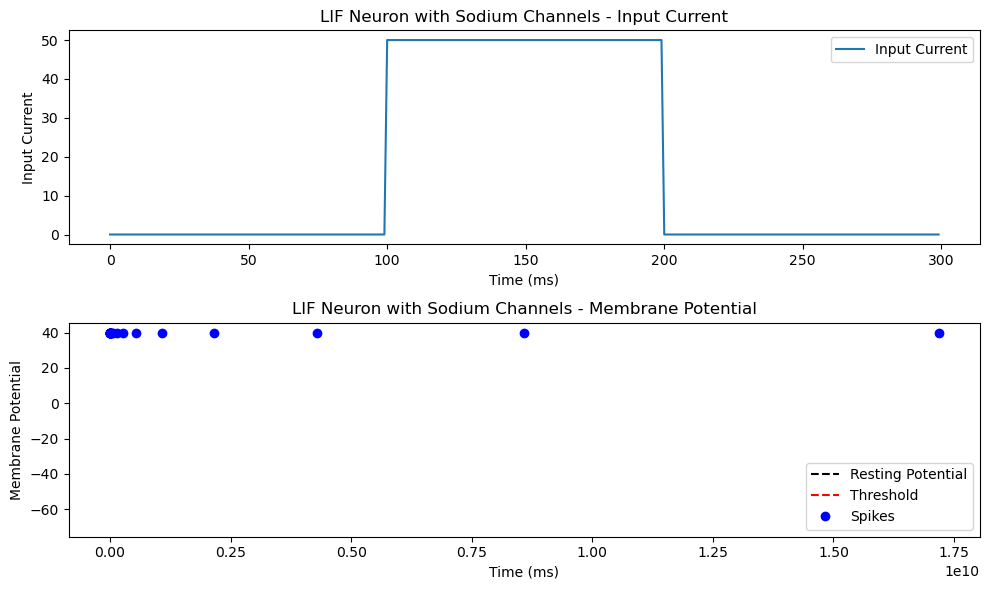

In [20]:
import numpy as np
import matplotlib.pyplot as plt

class LifNeuron:
    # The following is defining functions for variables as well as the integrating and firing of neurons
    def __init__(self, tau, R, threshold, resting_potential, sodium_channel_density):
        self.tau = tau  
    # This above value represents the membrane time constant
        self.R = R 
    # This above value represents the membrane resistance
        self.threshold = threshold
    # This above value represents the firing threshold
        self.resting_potential = resting_potential
    # This above value represents the resting membrane potential
        self.sodium_channel_density = sodium_channel_density  
    # This above value represents the density of the sodium channel

    
    #This next portion sets up the ability to calculate leaky intergration and check for spikes
        self.membrane_potential = self.resting_potential
        self.spike_times = []

    def sodium_channel_current(self, membrane_potential):
    # This above value represents the simplified sodium channel current model
        return self.sodium_channel_density * (membrane_potential - self.resting_potential)
    def integrate_and_fire(self, input_current, dt):
    # This above value represents leaky integration using Euler method and below represents these calculations
        delta_v = (input_current - (self.membrane_potential - self.resting_potential) / self.R
               - self.sodium_channel_current(self.membrane_potential)) * dt / self.tau
        self.membrane_potential += delta_v

    # This next portion is how we are able to check for spikes, dependent on spike times, spike membrane, and spike thresholds
        if self.membrane_potential >= self.threshold:
            self.spike_times.append(sum(self.spike_times) + dt)
            self.membrane_potential = self.resting_potential

    # The code below is defining a function that would simulate a certain neuron response
    def simulate(self, input_currents, dt):
        for current in input_currents:
            self.integrate_and_fire(current, dt)
    # The code below is defining a function to plot the results of a simulation of a certain neuron response
    def plot_results(self, input_currents, dt):
        time = np.arange(0, len(input_currents) * dt, dt)

        plt.figure(figsize=(10, 6))

    # This next portion of code allows us to plot the input current and output a figure
        plt.subplot(2, 1, 1)
        plt.plot(time, input_currents, label='Input Current')
        plt.title('LIF Neuron with Sodium Channels - Input Current')
        plt.xlabel('Time (ms)')
        plt.ylabel('Input Current')
        plt.legend()

    # This next portion of code allows us to plot the membrane potential and output a figure
        plt.subplot(2, 1, 2)
        plt.plot(time, [self.resting_potential] * len(time), 'k--', label='Resting Potential')
        plt.plot(time, [self.threshold] * len(time), 'r--', label='Threshold')
        spike_times_cumulative = np.cumsum(self.spike_times)
        plt.plot(spike_times_cumulative, [self.threshold] * len(spike_times_cumulative), 'bo', label='Spikes')
        plt.title('LIF Neuron with Sodium Channels - Membrane Potential')
        plt.xlabel('Time (ms)')
        plt.ylabel('Membrane Potential')
        plt.legend()

    # This portion is allowing us to see the figure outputs in the correct format
        plt.tight_layout()
        plt.show()

# The following represent different parameters represented in the code
TAU = 1  
# The above represents the membrane time constant in ms
R = 0.1  
# The above represents the membrane resistance in Ohms
THRESHOLD = 40  
# The above represents the firing threshold in mV
RESTING_POTENTIAL = -70
# The above represents the resting membrane potential in mV
SODIUM_CHANNEL_DENSITY = 0.02  
# The above represents the density of the sodium channel
DT = 1
# The above represents the time step in ms

# The below shows the input currents which will be used later in showing neuron response
input_currents = np.concatenate([np.zeros(100), np.ones(100) * 50, np.zeros(100)])

# The below code creates an LIF neuron using the membrane time constant, the membrane resistance, firing threshold, resting membrane potential, and sodium density  
neuron = LifNeuron(TAU, R, THRESHOLD, RESTING_POTENTIAL, SODIUM_CHANNEL_DENSITY)

# The below code simulates neuron response through the input currents and time step
neuron.simulate(input_currents, DT)

# The below is able to plot the results from the simulated neuron response
neuron.plot_results(input_currents, DT)

# The output from these values is not perfectly accurate as the sodium channels were not properly lining up with the current

### Question 3
The changes that had to be made include the following:
* sodium channel density is now calculated for use in sodium channel current, which would then lead to spiking
* <ins>sodium channel current:<ins> this method follows the Hodgkin Huxley model for current flow through a membrane and includes sodium channel density for integration into spikes
* the integrate and fire function now also includes sodium channels in its calculations
    
One aspect of our model that is inaccurate is that spikes were generated before the input current reached maximum depolarization (+50 mV), which would not actually occur in a biological neuron because maximum depolarization is needed to cross threshold and generate a spike.

### Question 4
The team was able to work collaboratively using Git-Hub efficiently since we could access and download the code our teammates uploaded there and continue their work. We did not know how to share a code file through GitHub at first, but we figured that out by simply sharing with another GitHub account associated with an email address. 

### Question 5
Modeling a simple feedforward neural network with gradient descent and backpropagation involves greater complexity due to implementing weight calculation and activation functions. Compared to the simpler Leaky Integrate-and-Fire (LIF) model, neural networks need to learn and represent more complex patterns and relationships in data. It requires matrix operations for efficient learning and multiple layers for hierarchical feature extraction and representation, thus increasing coding intricacy. This increased complexity suggests that the neural network captures and conveys richer information which enables it to learn more complex relationships between inputs and outputs.